#  **Практическое занятие №4. Метод градиентного спуска.**

## Попробуем воспроизвести примеры из лекции

### Одномерный случай 


Функция: 
$y = f(x) = x^2$

Производная: $f'(x)= 2x$

Начальное приближение: $x_0 =1.6$

Размер шага: $\gamma = 0.2$

Шаг градиентного спуска:
$x_{i+1} = x_i - \gamma 2x_i$


In [34]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib inline

In [35]:
from matplotlib import rc
rc('animation', html='html5')

In [37]:
def function_1d(x):
    return x**2

def gradient_1d(x):
    return x * 2 

def step(x, learning_rate):
    return x - learning_rate * gradient_1d(x)

def gradient_descent_alg(x_0, learning_rate, num_steps):
    history = [x_0]
    for _ in range(num_steps):
        history.append(step(history[-1], learning_rate))
    return history

In [46]:
X_1d = np.arange(-2, 2, 0.02)
Y_1d = function_1d(X_1d)

num_steps = 10
x_history = np.array(
    gradient_descent_alg(x_0=1.6, learning_rate=0.3, num_steps=num_steps)
)
y_history = function_1d(x_history)

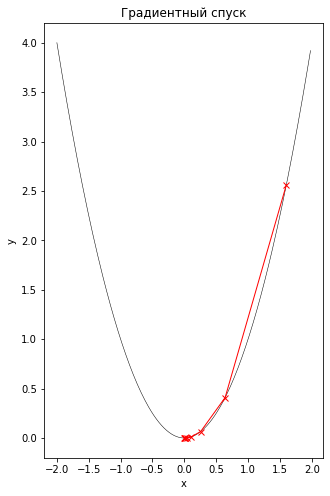

In [47]:
fig = plt.figure(figsize=(5, 8))
ax = fig.add_subplot(1, 1, 1)


def animate(i):
    ax.clear()
    ax.plot(X_1d, Y_1d, 'k-', linewidth=0.5)
    ax.plot(x_history[:i], y_history[:i], 'rx-', linewidth=1, zorder=10)
 
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Градиентный спуск')
 
 
animation.FuncAnimation(fig, animate, num_steps, interval=400, blit=False)

### Двумерный случай 


Функция: 
$z = f(x, y)\ =x^2 + y^2$


Градиент: $\nabla f(x, y) = (2x, 2y)$

Начальное приближение: $(x_0, y_0) = (0.8, 0.8)$

Размер шага: $\gamma = 0.1$

Шаг градиентного спуска:
$(x^{i+1}, y^{i+1}) = (x^i, y^i) - \gamma(2x^i, 2y^i)$

In [53]:
def function_2d(x, y):
    return x**2 + y**2

def gradient_2d(x, y):
    return np.array((2 * x, 2 * y))

def step(point, learning_rate):
    return point - learning_rate * gradient_2d(*point)

def gradient_descent_alg(x_0, y_0, learning_rate, num_steps):
    history = [np.array((x_0, y_0))]
    for i in range(1, num_steps + 1):
        history.append(step(np.array(history[i - 1]), learning_rate))
    return history


In [54]:
X = np.arange(-0.5, 1, 0.02)
Y = np.arange(-1, 1, 0.02)

X, Y = np.meshgrid(X, Y)
Z = function_2d(X, Y)

In [59]:
num_steps = 20
x_y_history = np.array(
    gradient_descent_alg(x_0=0.0, y_0=0.8, learning_rate=0.1, num_steps=num_steps)
)
x_history, y_history = x_y_history[:, 0], x_y_history[:, 1]
z_history = function_2d(x_history, y_history)

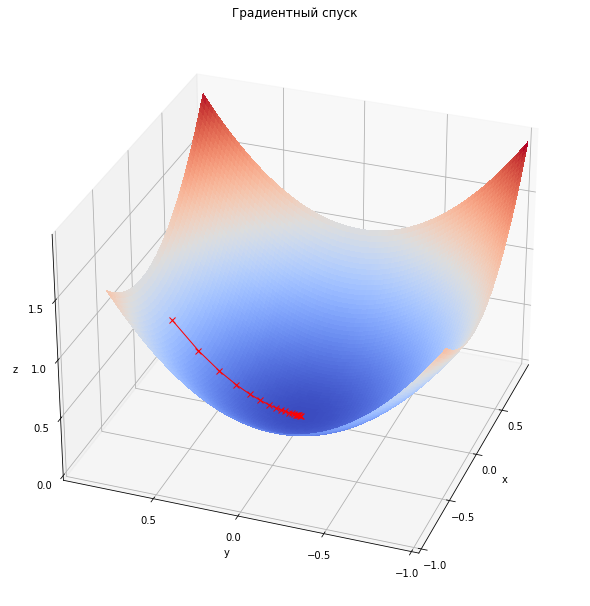

In [60]:
from matplotlib import cm
import mpl_toolkits.mplot3d.axes3d as p3

fig = plt.figure(figsize=(8, 8))
ax = p3.Axes3D(fig)


def animate(i):
    ax.clear()
    ax.view_init(30, -160)
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=1)
    ax.plot(x_history[:i], y_history[:i], z_history[:i], 'rx-', linewidth=1, zorder=10)

    ax.set_xlim3d([-1.0, 1.0])
    ax.set_xlabel('x')
    ax.set_xticks(np.arange(-1, 1, 0.5))

    ax.set_ylim3d([-1.0, 1.0])
    ax.set_yticks(np.arange(-1, 1, 0.5))
    ax.set_ylabel('y')

    ax.set_zlim3d([0.0, 2.0])
    ax.set_zticks(np.arange(0, 2, 0.5))
    ax.set_zlabel('z')

    ax.set_title('Градиентный спуск')


animation.FuncAnimation(fig, animate, num_steps, interval=400, blit=False)

## Линейная регрессия

Этот раздел создан с использованием материалов курса МФТИ "Машинное обучение"
https://github.com/girafe-ai/ml-mipt/blob/master/week0_02_linear_reg/week0_02_Linear_regression_and_SGD.ipynb

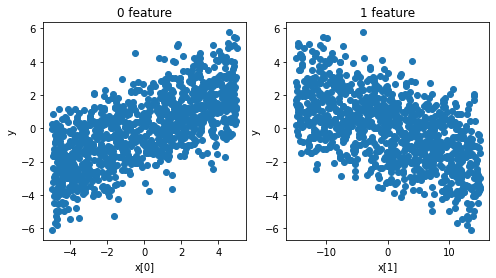

In [113]:
fig = plt.figure(figsize=(4 * n_features, 4))

ax = fig.subplots(1, 2)
for i in range(n_features):
    ax[i].scatter(X[:, i], Y)
    ax[i].set_xlabel('x[%d]' % i)
    ax[i].set_ylabel('y')
    ax[i].set_title('%d feature' % i)

plt.show()

Модель: $\hat{Y} = X\mathbf{w}$

Лосс: $Q(Y, X, \mathbf{w}) = MSE(Y, X\mathbf{w}) =  \frac{1}{N}\|Y - X\mathbf{w}\|^2_2 = \frac{1}{N}\sum_{i=0}^N (y_i - \mathbf{x}^T_i \mathbf{w})^2$

Градиент: $\nabla Q(\mathbf{w}) = -2X^TY + 2X^TX\mathbf{w} = 2X^T(X\mathbf{w} - Y)$ 

Шаг градиентного спуска: $\mathbf{w}^{step} = \mathbf{w}^{step - 1} - \gamma_{step} \nabla Q(\mathbf{w}^{step - 1})$

**Задача:** доказать, что эти формулы ничем не отличаются от тех, что были на лекции, за исключением того, что мы применяем их ко всем примерам датасета одновременно.

In [114]:
def linear_model(X, w):
    return X.dot(w)

def loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def gradient(X, Y, w):
    return 2 * X.T @ (X.dot(w) - Y) / Y.shape[0]

def step(X, Y, w, learning_rate, batch_size=None):
    if batch_size is None:
        return w - learning_rate * gradient(X, Y, w)
    else:
        assert batch_size <= Y.shape[0]
        idxs = np.random.choice(np.arange(Y.shape[0]), batch_size, replace=False)
        return w - learning_rate * gradient(X[idxs], Y[idxs], w)

def gradient_descent_alg(X, Y, w_0, learning_rate, num_steps, w_eps=1e-3, batch_size=None):
    history = [w_0]
    for i in range(num_steps):
        w_i = step(X, Y, history[-1], learning_rate, batch_size)
        if np.all(abs(w_i - history[-1]) < w_eps):
            print(f'Early stopping, step {i}')
            return history
        history.append(w_i)
    return history

In [115]:
# batch_size = 10

num_steps = 100
learning_rate = 1e-2

np.random.seed(45)

w_0 = np.random.uniform(-1, 2, n_features) - 0.5


In [110]:
w_list = np.array(gradient_descent_alg(X, Y, w_0, learning_rate, num_steps, batch_size=64))

In [69]:
# assert np.all(X @ w_0 == X.dot(w_0))

In [83]:
# w_list = np.array(gradient_descent_alg(X, Y, w_list[-1], learning_rate, num_steps))

<ipython-input-78-062badcb679a>:20: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


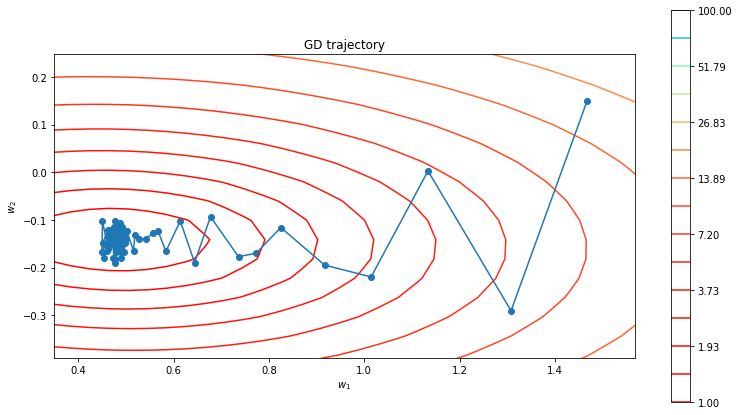

In [111]:
# compute level set
A, B = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))

levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        w_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = loss(Y, linear_model(X, w_tmp))

plt.figure(figsize=(13, 9))
plt.title('GD trajectory')
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
plt.gca().set_aspect('equal')

# visualize the level set
CS = plt.contour(A, B, levels, levels=np.logspace(0, 2, num=15), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.8, extend='both')

# visualize trajectory
plt.scatter(w_true[0], w_true[1], c='r')
plt.scatter(w_list[:, 0], w_list[:, 1])
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

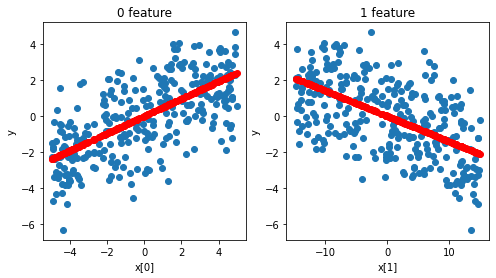

In [89]:
fig = plt.figure(figsize=(4 * n_features, 4))

ax = fig.subplots(1, 2)

def animate(i):
    for feature_idx in range(n_features):
        ax[feature_idx].clear()

        ax[feature_idx].scatter(X[:, feature_idx], Y)
        ax[feature_idx].scatter(X[:, feature_idx], X[:, feature_idx] * w_list[i, feature_idx], c='r')

        ax[feature_idx].set_xlabel('x[%d]' % feature_idx)
        ax[feature_idx].set_ylabel('y')
        ax[feature_idx].set_title('%d feature' % feature_idx)


animation.FuncAnimation(fig, animate, num_steps, interval=400, blit=False)



**Задание**: 

1.   Внести правки, чтобы градиентный спуск стал стохастическим
2.   Дополнить алгоритм критериями останова
3.   Сравнить скорость сходимости: построить график функции ошибки от числа просмотренных примеров


In [116]:
w_list_orig = np.array(gradient_descent_alg(X, Y, w_0, learning_rate, num_steps))
w_list_st = np.array(gradient_descent_alg(X, Y, w_0, learning_rate, num_steps, batch_size=64))

Early stopping, step 27


In [117]:
loss_orig = [loss(Y, linear_model(X, w_tmp)) for w_tmp in w_list_orig] 

In [120]:
loss_orig[0].shape

()

In [118]:
loss_st = [loss(Y, linear_model(X, w_tmp)) for w_tmp in w_list_st] 


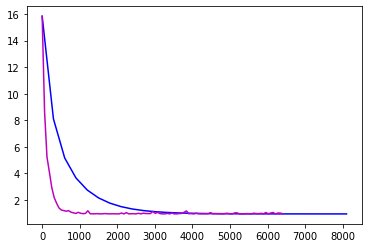

In [126]:
plt.plot([Y.shape[0] * i for i in range(len(loss_orig))], loss_orig, c='b', label='original')
plt.plot([64 * i for i in range(len(loss_st))], loss_st, c='m', label='stochastic')

In [33]:
#!g1.1
! nvidia-smi

Sat Mar 26 11:31:48 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.91.03    Driver Version: 460.91.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:8C:00.0 Off |                    0 |
| N/A   31C    P0    22W / 300W |      4MiB / 32510MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Дополнительное задание**: всё то же самое, но на tf

https://www.tensorflow.org/guide/basics